# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

### 1) Is the distribution of body temperatures normal? ###

In [3]:
# check how the data looks like
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
# shape of dataframe to know the number of rows and columns.
df.shape

(130, 3)

In [6]:
# lets have the temperature column in an array  (bt_array)
bt_array = df['temperature']
bt_array.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import pylab

In [8]:
# calculating lenth of the array(dataset): n_data
n_data = len(bt_array)

# calculating ideal number of bins in the histogram: n_bin
n_bin = np.sqrt(n_data)
n_bin = int(n_bin)

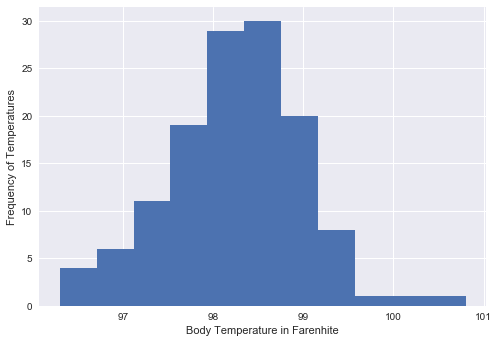

In [9]:
#plot histagram to check for the normal distribution.
sns.set()
_ = plt.hist(df['temperature'], bins=n_bin)
_ = plt.xlabel('Body Temperature in Farenhite')
_ = plt.ylabel('Frequency of Temperatures')
plt.show()

The above histogram looks very close to bell curve to suggest the normal distribution little bit right skwed. But let's try to plot probability desity fuction(PDF) to find if the data is normal distribution.

In [10]:
# first create a function ecdf(), comulative distribution function.
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n=len(data)
    x=np.sort(data)
    y=np.arange(1, n+1)/n
    return x, y


In [11]:
# Checking normality of body temperature data.

# calculating the mean and standard deviation from the data.
mean = np.mean(bt_array)
std = np.std(bt_array)

# getting theoratical data in sample
sample = np.random.normal(mean, std, size=130) 

# x and y values from original the data set
x, y = ecdf(bt_array)

# x_theor, y_theor values from the sample data set
x_theor, y_theor = ecdf(sample)

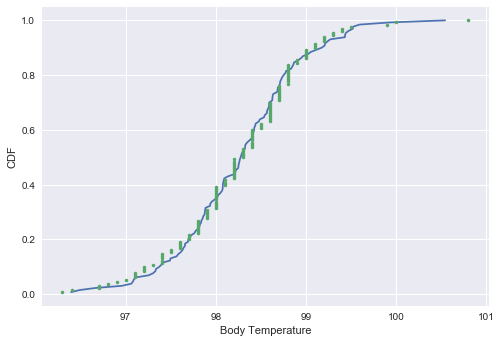

In [12]:
# plot theor and original data in the same plot.
sns.set()
_=plt.plot(x_theor, y_theor)
_=plt.plot(x, y, marker='.', linestyle = 'none')
_=plt.xlabel('Body Temperature')
_=plt.ylabel('CDF')
plt.show()

The CDF of body temperature follows the theoritcal normal distribution hence we can say that "the distribution of body temperatures is normal." 

### 2) Is the sample size large? Are the observations independent? ###

##### CLT Assumptions and Conditions #####

To use the normal model, we must meet some assumptions and conditions. The Central Limit Theorem assumes the following:

__Randomization Condition:__ The data must be sampled randomly.

__Independence Assumption:__ The sample values must be independent of each other. This means that the occurrence of one event has no influence on the next event. Usually, if we know that people or items were selected randomly we can assume that the independence assumption is met.

__10% Condition:__ When the sample is drawn without replacement (usually the case), the sample size, n, should be no more than 10% of the population.

__Sample Size Assumption:__ The sample size must be sufficiently large. Although the Central Limit Theorem tells us that we can use a Normal model to think about the behavior of sample means when the sample size is large enough, it does not tell us how large that should be. If the population is very skewed, you will need a pretty large sample size to use the CLT, however if the population is unimodal and symmetric, even small samples are acceptable. So think about your sample size in terms of what you know about the population and decide whether the sample is large enough. In general a sample size of 30 is considered sufficient if the sample is unimodal (and meets the 10% condition)

__Conclusion:__ since we have __130__ observations in the sample. We can say that our sample size is __large and independent.__ 


### 3) Is the true population mean really 98.6 degrees F? ###
1. Would you use a one-sample or two-sample test? Why?

2. In this situation, is it appropriate to use the  t  or  z  statistic?

3. Now try using the other test. How is the result be different? Why?

__3.1)Solution:__ I will use one sample test as we have do not have the data set for 98.6 degree F.

__Hypothesis:__ The true population mean is 98.6 degree F.


In [13]:
# Lets do test statistics to calculate the p-value.

# define a function to create 1d bootstrap sample array.
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))


In [14]:
# define another function to get the bootstrap sample for the desired number of times.
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [15]:
# Define another function to computer the difference of means
def diff_mean(data, given_mean=98.6):
    return np.mean(data) - given_mean

In [16]:
# Make an array of translated body temperature: translated_bt_array
translated_bt_array = bt_array - np.mean(bt_array) + 98.6

# Calculating difference of mean
mean_diff = diff_mean(bt_array)

# Take bootstrap replicates of translated body temeperature: bs_replicates
bs_replicates = draw_bs_reps(translated_bt_array, diff_mean, 130)

# Compute fraction of replicates that are less than the observed body temperature: p
p = np.sum(bs_replicates <= mean_diff) / 130

# Print the p-value
print('p = ', p)

p =  0.0


__The null hypothesis is not true.__

Now will try other method to compute the p value to find out if there is any difference in my obeservation. 

In [17]:
# we already have calulated the mean and satandard deviation of sample above.
#Just printing the values.
print ('The mean of sample data is: ', mean)
print ('The standard deviation of sample data is: ', std)

# will calculate SE(standard error). using formula SE = std / sqrt(n_data).: SE
# we have already calculated the lenght of array in valriable n_data which is 130.
SE = std/np.sqrt(n_data)
print("SE: ", SE)

# will calculate the z value now.: z
z=(mean-98.6)/SE
print("z-value: ",z)

# p-value calculation: p_value
p_value = st.ttest_1samp(bt_array, popmean = 98.6)
print(p_value)

The mean of sample data is:  98.24923076923078
The standard deviation of sample data is:  0.7303577789050377
SE:  0.0640566146952
z-value:  -5.47592520208
Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


__Conclusion:__ Since p-value is very small the null hypothsis is rejected.

We can say that the true population mean is not 98.6 degree F.

__3.2)Solution__ : In this situation z statistic would be used as the sample size is more than 30. i.e. 130. We use t-test when we have sample size of 30 or less than 30.

__3.3)Solution:__ we have perform other t test on the sample dataset and have a very small p value. Both the calculation imply the same thing but the p value is different. This may have happen becuase stat.ttest calculated the t and p value of the original dataset, whereas the first calculation was performed manually on bootstrap dataset.

### 4)At what temperature should we consider someone's temperature to be "abnormal"? ###
**Hint:** Start by computing the margin of error and confidence interval.

In [18]:
# calculate bootstrap replicates of the given dataset: bs_repl
bs_repl = draw_bs_reps(bt_array, np.mean, 130)

# compute the 95% confidence interval: confd_intrvl
confd_intrvl = np.percentile(bs_repl, [2.5, 97.5])
print(confd_intrvl)


[ 98.14538462  98.38534615]


AS per above Confidence interval calculation temperature less than 98.14 and greater than 98.38 degree F should be considered as "abnormal".

### 5)Is there a significant difference between males and females in normal temperature? ###

__5)Solution:__ We will do two sample test which have the same mean impact body temperature(hypothesis), but not necessarily the same distribution.

To do the two-sample bootstrap test, we shift both arrays to have the same mean in our case it is mean of the bt_array. 

_Since we are simulating the hypothesis that their means are, in fact, equal._

We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [19]:
# store the body temperature of all the males in the given dataset: bt_array_m
bt_array_m = df.temperature[df.gender == 'M']

# checking the information of all the dataset.
bt_array_m.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [20]:
# store the body temperature of all the females in the given dataset: bt_array_f
bt_array_f = df.temperature[df.gender == 'F']

# checking the information of all the dataset.
bt_array_f.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [21]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [25]:
# Compute mean of entire sample, which is stored in variable mean.
#print("The mean of bt_array is: ", mean)

# calculation of difference of means of male and female body temperature: bt_mean_diff
bt_mean_diff = diff_of_means(bt_array_f, bt_array_m)

# Generate shifted arrays
bt_array_m_shifted = bt_array_m - np.mean(bt_array_m) + mean
bt_array_f_shifted = bt_array_f - np.mean(bt_array_f) + mean 

# Compute 65 bootstrap replicates from shifted arrays
bs_replicates_m = draw_bs_reps(bt_array_m_shifted, np.mean, 65)
bs_replicates_f = draw_bs_reps(bt_array_f_shifted, np.mean, 65)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_f - bs_replicates_m

# Compute and print p-value: p
p = np.sum(bs_replicates >= bt_mean_diff) / len(bs_replicates)
print('p-value =', p)


p-value = 0.0153846153846


Since the p value is very small we can say that there is no significant difference in the body temperature of male and  females.